<a href="https://colab.research.google.com/github/microprediction/m6/blob/main/five_way_rank_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade git+https://github.com/microprediction/winning.git

In [ ]:
!pip install --upgrade scipy

### Illustration of 5-way rank probabilities
... calculated assuming return distributions and a Gaussian copula

In [6]:
from winning.lattice import skew_normal_density
from winning.lattice_plot import densitiesPlot
from pprint import pprint


We'll use skew-normal returns, just as an example

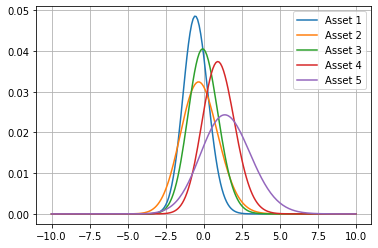

In [3]:
mus = [-0.5, -0.25, 0, 1, 1.5 ]
scales = [ 1.0, 1.5, 1.2, 1.3, 2.0]
densities = [ skew_normal_density(L=100, unit=0.1, scale=scale, loc=mu, a=1.0) for mu,scale in zip(mus,scales) ]
legend = ['Asset '+str(i) for i in range(1,6)]
densitiesPlot(densities=densities,unit=0.1,legend=legend)


Next we compute rank probabilities. Technically these are state prices, not probabilities. This takes a minute in colab but only 3 seconds on a mac mini.

In [18]:
from winning.lattice_copula import gaussian_copula_five
import time 
st = time.time()
rank_probs = gaussian_copula_five(densities, rho=0.25)
print({'elapsed':time.time()-st})


{'elapsed': 81.75318026542664}


In [19]:
import pandas as pd
index = ['Rank '+str(i) for i in range(1,6)]
RP = pd.DataFrame(columns=legend,data=rank_probs, index=index).transpose()

In [ ]:
!pip install array-to-latex

In [8]:
import array_to_latex as a2l
import numpy as np
a2l.to_ltx(np.asarray(rank_probs), frmt = '{:6.2f}', arraytype = 'array')

\begin{array}
    0.37 &    0.32 &    0.20 &    0.04 &    0.07\\
    0.33 &    0.24 &    0.26 &    0.10 &    0.08\\
    0.20 &    0.21 &    0.28 &    0.19 &    0.12\\
    0.08 &    0.15 &    0.19 &    0.37 &    0.21\\
    0.02 &    0.08 &    0.07 &    0.31 &    0.52
\end{array}


In [20]:
a2l.to_ltx(RP)

\begin{tabular}{lrrrrr}
\toprule
     & Rank 1 & Rank 2 & Rank 3 & Rank 4 & Rank 5 \\\n\midrule
 Asset 1 &  0.38 &  0.33 &  0.20 &  0.08 &  0.02\\
 Asset 2 &  0.32 &  0.24 &  0.21 &  0.15 &  0.07\\
 Asset 3 &  0.20 &  0.26 &  0.29 &  0.18 &  0.07\\
 Asset 4 &  0.04 &  0.09 &  0.19 &  0.37 &  0.31\\
 Asset 5 &  0.06 &  0.08 &  0.12 &  0.21 &  0.53\\
\bottomrule
\end{tabular}


In [21]:
a2l.to_ltx(np.asarray([mus,scales]))

\begin{bmatrix}
 -0.50 & -0.25 &  0.00 &  1.00 &  1.50\\
  1.00 &  1.50 &  1.20 &  1.30 &  2.00
\end{bmatrix}
